In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
df = pd.read_csv("fifa.csv")

In [3]:
df = df.drop(columns="Unnamed: 0")
df.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2       9014  https://sofifa.com/player/9014/arjen-robben/15...   
3      41236  https://sofifa.com/player/41236/zlatan-ibrahim...   
4     167495  https://sofifa.com/player/167495/manuel-neuer/...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   27  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   29  1985-02-05   
2          A. Robben                         Arjen Robben   30  1984-01-23   
3     Z. Ibrahimović                   Zlatan Ibrahimović   32  1981-10-03   
4           M. Neuer                         Manuel Neuer   28  1986-03-27   

   height_cm  weight_kg  nationality            club_name  \
0        169         67    Argentina         FC Barcelona   
1        185         80     Portugal          Real Madrid   
2        180         80  Netherlands    FC Bayern München   
3        195         95       Sweden  Paris Saint-Germain   
4        193         92      Germany    FC Bayern München   

              league_name  league_rank  overall  potential  value_eur  \
0  Spain Primera Division          1.0       93         95  100500000   
1  Spain Primera Division          1.0       92         92   79000000   
2    German 1. Bundesliga          1.0       90         90   54500000   
3          French Ligue 1          1.0       90         90   52500000   
4    German 1. Bundesliga          1.0       90         90   63500000   

   wage_eur player_positions preferred_foot  international_reputation  \
0    550000               CF           Left                         5   
1    375000           LW, LM          Right                         5   
2    275000       RM, LM, RW           Left                         5   
3    275000               ST          Right                         5   
4    300000               GK          Right                         5   

   weak_foot  skill_moves      work_rate body_type real_face  \
0          3            4     Medium/Low    Normal       Yes   
1          4            5       High/Low    Normal       Yes   
2          2            4       High/Low    Normal       Yes   
3          4            4     Medium/Low    Normal       Yes   
4          4            1  Medium/Medium    Normal       Yes   

   release_clause_eur                                        player_tags  \
0                 NaN  #Speedster, #Dribbler, #FK Specialist, #Acroba...   
1                 NaN  #Speedster, #Dribbler, #Distance Shooter, #Acr...   
2                 NaN  #Speedster, #Dribbler, #Distance Shooter, #Acr...   
3                 NaN  #Poacher, #Aerial Threat, #Distance Shooter, #...   
4                 NaN                                                NaN   

  team_position  team_jersey_number loaned_from      joined  \
0            CF                10.0         NaN  2004-07-01   
1            LW                 7.0         NaN  2009-07-01   
2           SUB                10.0         NaN  2009-08-28   
3            ST                10.0         NaN  2012-07-01   
4            GK                 1.0         NaN  2011-07-01   

   contract_valid_until nation_position  nation_jersey_number  pace  shooting  \
0                2018.0              CF                  10.0  93.0      89.0   
1                2018.0              LW                   7.0  93.0      93.0   
2                2017.0              RS                  11.0  93.0      86.0   
3                2016.0              ST                  10.0  76.0      91.0   
4                2019.0              GK                   1.0   NaN       NaN   

   passing  dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
0     86.0       96.0       27.0    63.0        NaN          NaN         NaN   
1     81.0       9

In [4]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name', 'league_name',
       'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur',
       'player_positions', 'preferred_foot', 'international_reputation',
       'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'team_position',
       'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until',
       'nation_position', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 

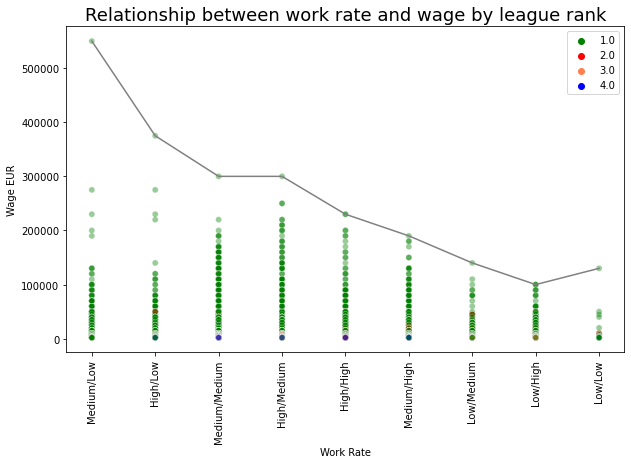

In [5]:
plt.figure(figsize=(10, 6))

ax = sns.scatterplot(x ='work_rate',
                    y = df['wage_eur'],
                    hue = "league_rank",
                    data = df,
                     palette = ["green", "red", "coral", "blue"],
                     legend="full",
                     alpha = 0.4
                    )
max_wage_eur = df.groupby("work_rate")["wage_eur"].max()

sns.lineplot(data = max_wage_eur,
            ax = ax.axes,
            color="grey")

ax.tick_params(axis= "x", rotation=90)
plt.xlabel("Work Rate")
plt.ylabel("Wage EUR")
plt.title("Relationship between work rate and wage by league rank", fontsize = 18)
plt.show()

In [6]:
len(df['nationality'].unique())

149

In [7]:
nationality = " ".join(n for n in df['nationality'])

In [8]:
from wordcloud import WordCloud 

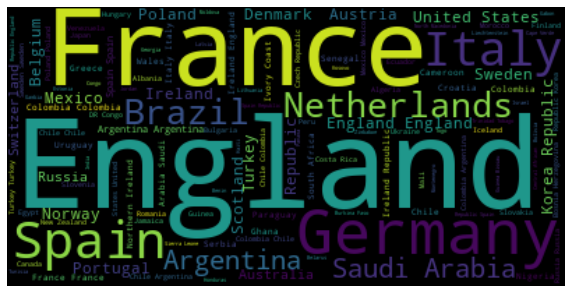

In [25]:
plt.figure(figsize=(10, 10))
wc = WordCloud().generate(nationality)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
nationality_count = df['nationality'].value_counts()

In [10]:
nationality_count[:20]

England                1627
Spain                  1051
France                  958
Argentina               867
Italy                   795
Germany                 701
Colombia                543
Republic of Ireland     460
Netherlands             419
Brazil                  416
Mexico                  416
Chile                   411
Sweden                  398
Saudi Arabia            362
Poland                  342
United States           342
Turkey                  341
Portugal                337
Korea Republic          328
Scotland                323
Name: nationality, dtype: int64

In [45]:
top_20_nat= nationality_count.index[:20]

In [46]:
top_20_nat

Index(['England', 'Spain', 'France', 'Argentina', 'Italy', 'Germany',
       'Colombia', 'Republic of Ireland', 'Netherlands', 'Brazil', 'Mexico',
       'Chile', 'Sweden', 'Saudi Arabia', 'Poland', 'United States', 'Turkey',
       'Portugal', 'Korea Republic', 'Scotland'],
      dtype='object')

In [47]:
clubs_count = df['club_name'].value_counts()
top_20_club = clubs_count[:20].index
top_20_club

Index(['Southampton', 'Olympique Lyonnais', 'Burnley', 'Sevilla FC',
       'Borussia Dortmund', 'Deportivo de La Coruña',
       'Athletic Club de Bilbao', 'Inter', 'OGC Nice', 'Hull City',
       'Liverpool', 'FC Nantes', 'Hannover 96', 'FC Schalke 04',
       'Swansea City', 'Parma', 'Fiorentina', 'Manchester City', 'Real Madrid',
       'Juventus'],
      dtype='object')

In [48]:
league_count = df['league_name'].value_counts()
top_20_leagues = league_count[:20].index
top_20_leagues

Index(['English League Championship', 'English Premier League',
       'English League One', 'Italian Serie A', 'Spain Primera Division',
       'English League Two', 'Italian Serie B', 'Spanish Segunda División',
       'French Ligue 1', 'Argentina Primera División', 'German 1. Bundesliga',
       'USA Major League Soccer', 'French Ligue 2', 'Mexican Liga MX',
       'Portuguese Liga ZON SAGRES', 'Colombian Liga Postobón',
       'Turkish Süper Lig', 'German 2. Bundesliga',
       'Chilian Campeonato Nacional', 'Holland Eredivisie'],
      dtype='object')

In [49]:
df_nationality = df[df.nationality.isin(top_20_nat)]
df_clubs = df[df.club_name.isin(top_20_club)]
df_league = df[df.league_name.isin(top_20_leagues)]

Text(0.5, 0, 'Age')

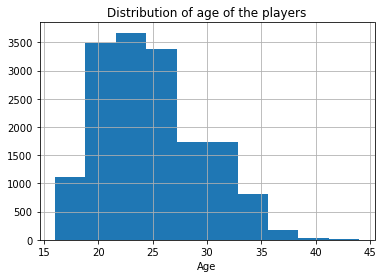

In [15]:
df['age'].hist()
plt.title("Distribution of age of the players")
plt.xlabel("Age")

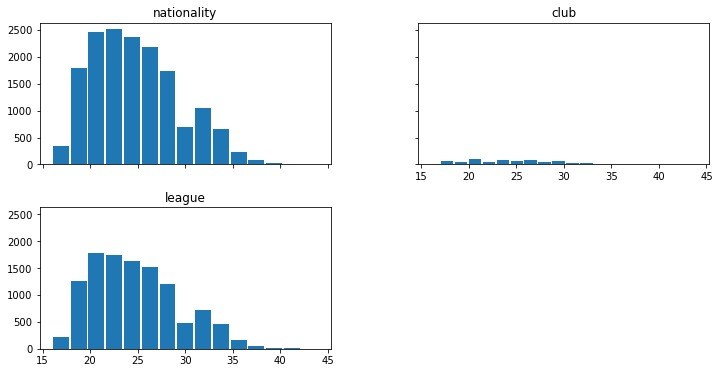

In [16]:
pd.DataFrame({'nationality': df_nationality['age'], 
              'club': df_clubs['age'], 
              'league': df_league['age']}).hist(bins = 15,
                                                  figsize=(12, 6),
                                                  grid=False,
                                                  rwidth=0.9,
                                                  sharex=True,
                                                  sharey=True)
plt.show()

In [17]:
def make_dictionary(col):
    dictn = {}
    val = 0
    for i in col.unique():
        if i not in dictn:
            dictn[i] = val+1
            val += 1
    return dictn  

In [18]:
new_nation_position= make_dictionary(df['nation_position'])

In [19]:
df['nation_position1'] = df['nation_position'].replace(new_nation_position)

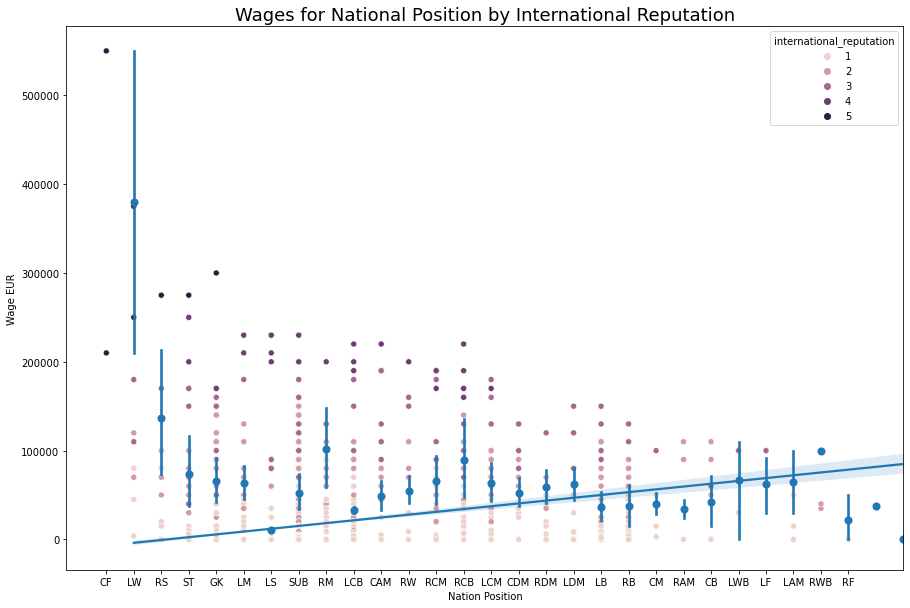

In [20]:
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x= df['nation_position'],
                    y = df['wage_eur'],
                    hue = df['international_reputation'],
                    legend = "full",
                    data = df,
                    x_jitter = 1000)

ax = sns.regplot(x= 'nation_position1',
                  y = df['wage_eur'],
                  data = df,
                  ax=ax.axes,
                 x_estimator=np.mean
                 )

plt.xlabel("Nation Position")
plt.ylabel("Wage EUR")
plt.title("Wages for National Position by International Reputation", fontsize=18)
plt.show()     

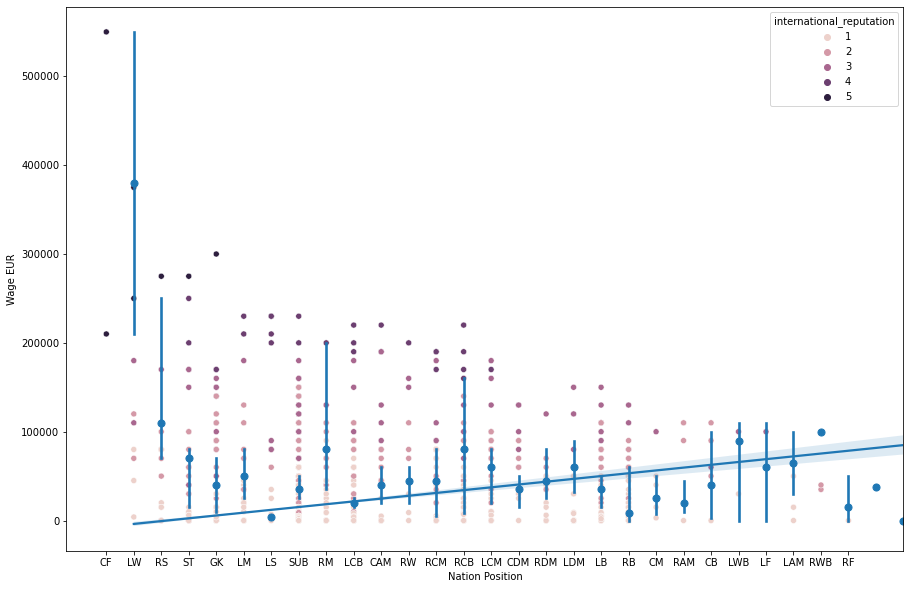

In [21]:
plt.figure(figsize=(15, 10))
ax = sns.scatterplot(x= df['nation_position'],
                    y = df['wage_eur'],
                    hue = df['international_reputation'],
                    legend = "full",
                    data = df,
                    x_jitter = 1000)

ax = sns.regplot(x= 'nation_position1',
                  y = df['wage_eur'],
                  data = df,
                  ax=ax.axes,
                 x_estimator=np.median
                 )

plt.xlabel("Nation Position")
plt.ylabel("Wage EUR")
plt.show()     

In [22]:
df['real_face1'] = df['real_face'].replace({"Yes":1, "No":2})

C:\Users\rashi\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\rashi\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\rashi\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\rashi\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:893: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)


KeyboardInterrupt: 

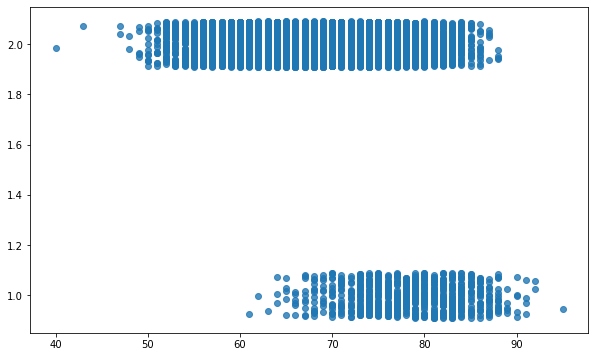

In [23]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x = 'potential',
                y = 'real_face1',
                data = df,
                logistic=True,
                y_jitter=0.09)

In [24]:
df['preferred_foot1'] = df['preferred_foot'].replace({"Left":1, "Right":2})

C:\Users\rashi\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\rashi\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\rashi\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\rashi\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:893: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)


<Figure size 720x432 with 0 Axes>

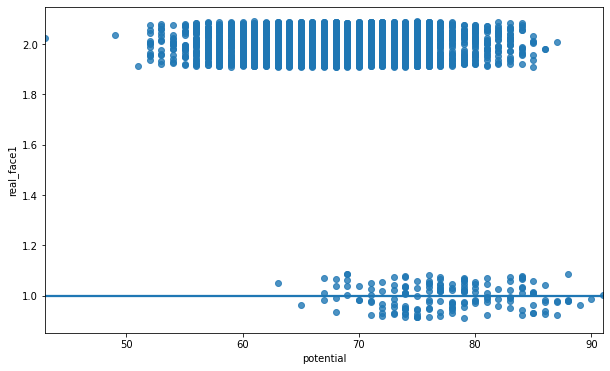

In [64]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x = 'potential',
                y = 'real_face1',
                data = df.sample(frac = 0.2),
                logistic=True,
                y_jitter=0.09)

In [25]:
df['preferred_foot1'] = df['preferred_foot'].replace({"Left":1, "Right":2})

C:\Users\rashi\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\rashi\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:893: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\rashi\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\rashi\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


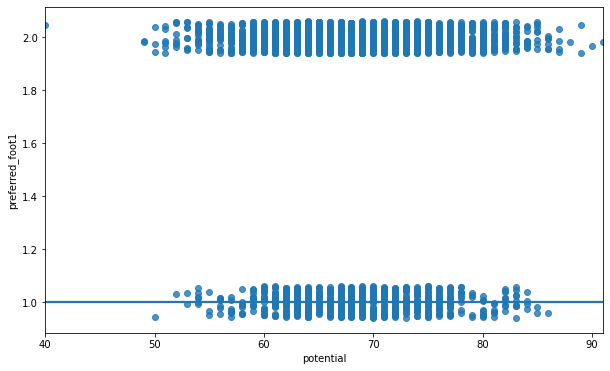

In [66]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x = 'potential',
                y = 'preferred_foot1',
                data = df.sample(frac = 0.2),
                logistic=True,
                y_jitter=0.06)

(0.0, 5000000.0)

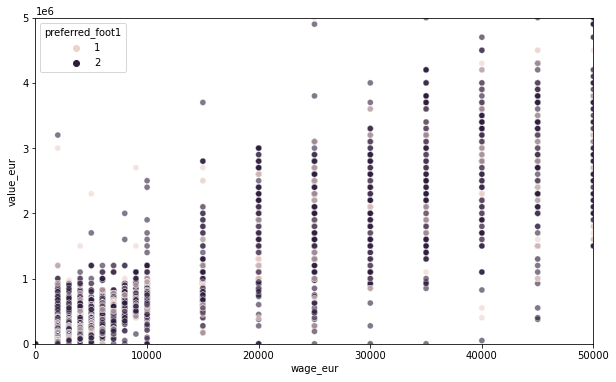

In [26]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x = "wage_eur", y = "value_eur", 
                 hue = "preferred_foot1",
                     alpha = 0.6,
                 data = df)
ax.set_xlim(0, 50000)
ax.set_ylim(0, 0.05*1e8)

In [27]:
from matplotlib.patches import ConnectionPatch

In [28]:
0.07*1e8

7000000.000000001

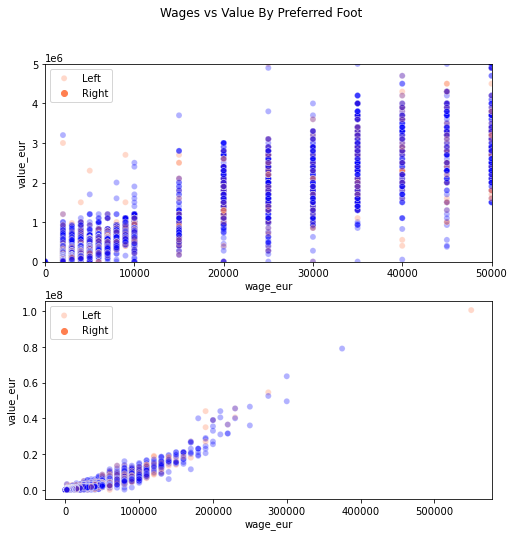

In [29]:
fig = plt.figure(figsize=(8, 8))
fig.suptitle("Wages vs Value By Preferred Foot")

plt1 = fig.add_subplot(2, 2, (1, 2))

plt1=sns.scatterplot(x = "wage_eur", y = "value_eur",
              hue = "preferred_foot1", alpha = 0.3,
                  palette=['coral', 'blue'],   
              data = df)
plt1.set_xlim(0, 50000)
plt1.set_ylim(0, 0.05*1e8)
plt1.legend(['Left', 'Right'])


plt2 = fig.add_subplot(2, 2, (3, 4))

plt2=sns.scatterplot(x = "wage_eur", y = "value_eur",
              hue = "preferred_foot1", alpha = 0.3,
                  palette=['coral', 'blue'],   
              data = df)
plt2.legend(['Left', 'Right'])
plt.show()

<AxesSubplot:xlabel='wage_eur', ylabel='Density'>

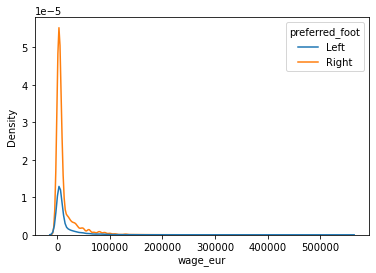

In [30]:
sns.kdeplot(x = "wage_eur", hue="preferred_foot", data=df)

<AxesSubplot:xlabel='value_eur', ylabel='Density'>

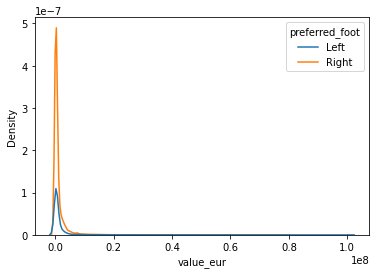

In [31]:
sns.kdeplot(x = "value_eur", hue="preferred_foot", data=df)

In [32]:
df['preferred_foot'].value_counts()

Right    12478
Left      3677
Name: preferred_foot, dtype: int64

C:\Users\rashi\anaconda3\lib\site-packages\seaborn\distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
C:\Users\rashi\anaconda3\lib\site-packages\seaborn\distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


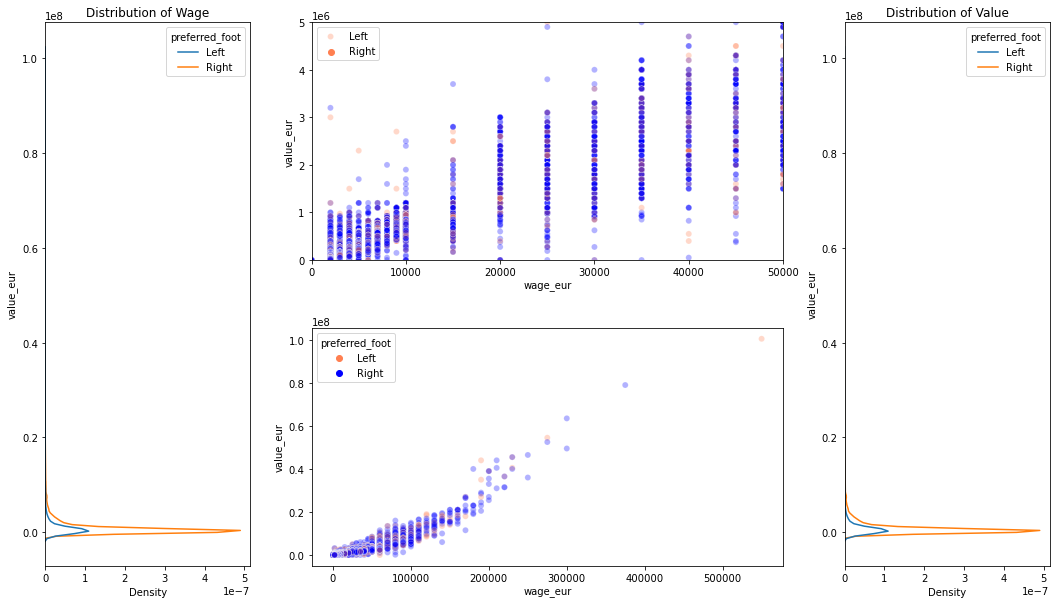

In [33]:
plt.figure(figsize = (18, 10))
grid = plt.GridSpec(4, 4, wspace =0.3, hspace = 0.8)

g1 = plt.subplot(grid[:, 0])
g2 = plt.subplot(grid[:2, 1:3])
g3 = plt.subplot(grid[2:, 1:3])
g4 = plt.subplot(grid[:, 3])

g1.set_title("Distribution of Wage", fontsize=12)
sns.kdeplot(x = "value_eur", hue="preferred_foot", 
            vertical=True,
            data=df, ax=g1)

sns.scatterplot(x = "wage_eur", y = "value_eur",
              hue = "preferred_foot1", alpha = 0.3,
                palette=['coral', 'blue'], 
                data = df, ax=g2)
g2.set_xlim(0, 50000)
g2.set_ylim(0, 0.05*1e8)
g2.legend(['Left', 'Right'])


sns.scatterplot(x = "wage_eur", y = "value_eur",
              hue = "preferred_foot", alpha = 0.3,
              palette=['coral', 'blue'],   
              data = df, ax=g3)


g4.set_title("Distribution of Value", fontsize=12)
sns.kdeplot(x = "value_eur", hue="preferred_foot",
            vertical=True,
            data=df, ax=g4)

plt.show()

In [34]:
df['body_type1'] = df['body_type'].replace({"Normal": 1, "Lean":2, "Stocky":3})

(160.0, 200.0)

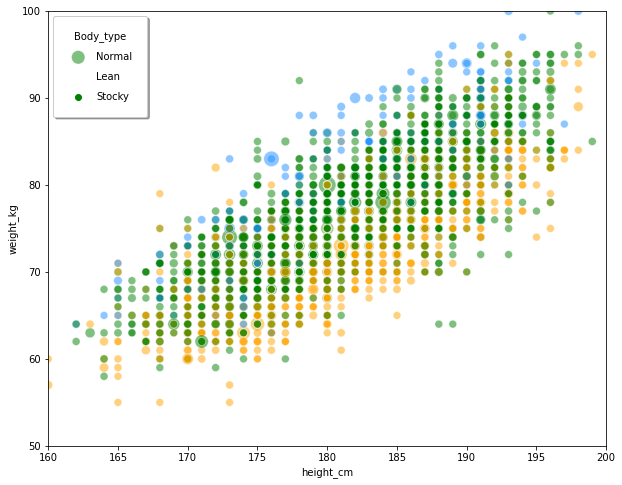

In [35]:
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(x = "height_cm", y = "weight_kg", 
                 hue = "body_type1",
                     alpha = 0.5, size = "value_eur", sizes = (60, 300),
                     palette=['green','orange','dodgerblue'],
                 data = df.sample(frac=0.25))
ax.legend(df['body_type'].unique().tolist(), fancybox=True, 
          shadow=True,borderpad=1.5,
          labelspacing=1, scatterpoints=1,
          title="Body_type")
ax.set_ylim([50, 100])
ax.set_xlim([160, 200])

Text(0, 0.5, 'Weight')

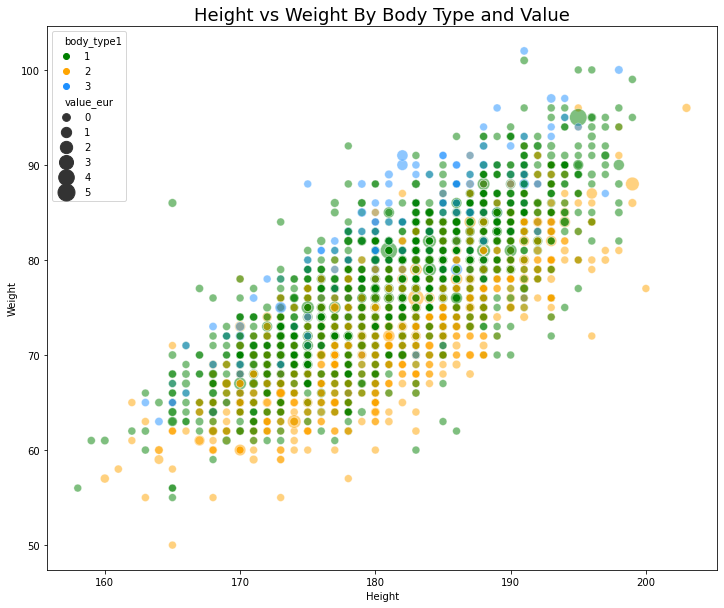

In [36]:
from matplotlib.pyplot import legend
plt.figure(figsize=(12, 10))
sns.scatterplot(x = "height_cm", y = "weight_kg", 
                 hue = "body_type1",
                     alpha = 0.5, size = "value_eur", sizes = (60, 300),
                     palette=['green','orange','dodgerblue'],
                 data = df.sample(frac=0.25))

ax.set_ylim([50, 100])
ax.set_xlim([160, 200])
plt.title("Height vs Weight By Body Type and Value",
            fontsize=18)
plt.xlabel("Height")
plt.ylabel("Weight")

#plt.show()

<Figure size 864x576 with 0 Axes>

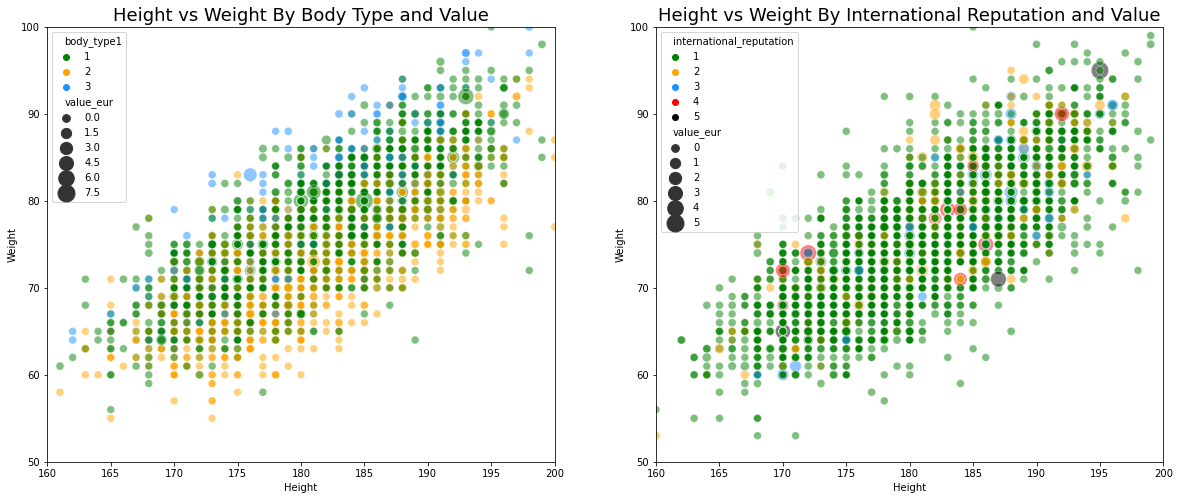

In [37]:
plt.figure(figsize=(12, 8))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
#fig.suptitle("International Reputation and Value with Height and Weight, and Body Type")

sns.scatterplot(x = "height_cm", y = "weight_kg", 
                 hue = "body_type1",
                     alpha = 0.5, size = "value_eur", sizes = (60, 300),
                     palette=['green','orange','dodgerblue'],
                 data = df.sample(frac=0.25), ax=ax1)

ax1.set_ylim([50, 100])
ax1.set_xlim([160, 200])
ax1.set_title("Height vs Weight By Body Type and Value",fontsize=18)
ax1.set_xlabel("Height")
ax1.set_ylabel("Weight")


sns.scatterplot(x = "height_cm", y = "weight_kg", 
                 hue = "international_reputation",
                     alpha = 0.5, size = "value_eur", sizes = (60, 300),
                     palette=['green','orange','dodgerblue', 'red', 'black'],
                 data = df.sample(frac=0.25), ax=ax2)

ax2.set_ylim([50, 100])
ax2.set_xlim([160, 200])
ax2.set_title("Height vs Weight By International Reputation and Value",fontsize=18)
ax2.set_xlabel("Height")
ax2.set_ylabel("Weight")

plt.show()

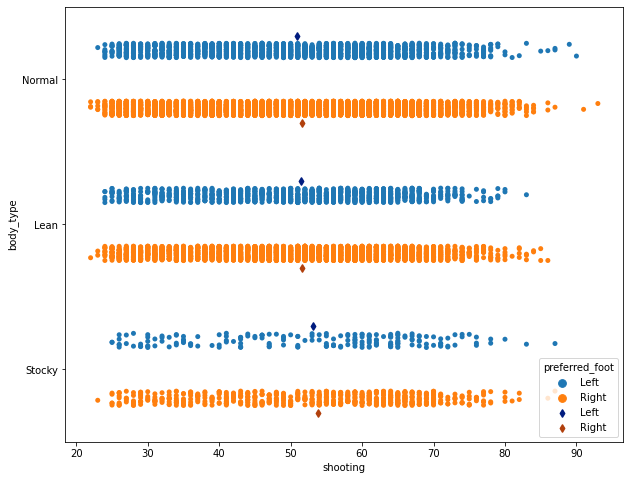

In [205]:
_, ax = plt.subplots(figsize=(10, 8))
#sns.despine(bottom=True, left=True)

sns.stripplot(x = "shooting",
       y = "body_type",
       hue = "preferred_foot",
       data = df,
       dodge = 0.8, zorder=1)

sns.pointplot(x = "shooting",
              y = "body_type",
              hue = "preferred_foot",
              data=df, dodge=0.6,join=False,
              palette="dark", markers="d",
              scale=0.75, ci=None)
handles, labels = ax.get_legend_handles_labels()


In [38]:
def make_dictionary(col):
    dictn = {}
    val = 0
    for i in df[col].unique():
        if i not in dictn:
            dictn[i] = val+1
            val += 1
    return dictn 

nat_dictn = make_dictionary('nation_position')

In [39]:
df['nation_position1'] = df['nation_position'].replace(nat_dictn)

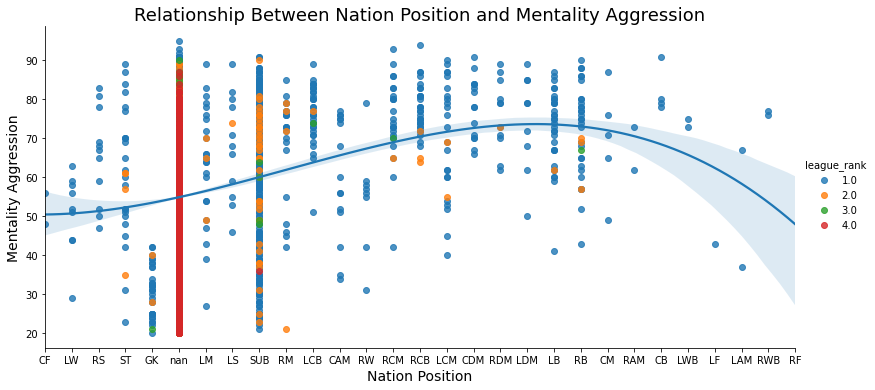

In [40]:
ax = sns.lmplot(x = "nation_position1",
               y = "mentality_aggression",
               data = df, hue = "league_rank", fit_reg = False, height = 5, aspect = 2.2)
sns.regplot(x = "nation_position1",
               y = "mentality_aggression",
               data = df, scatter=False, ax=ax.axes[0, 0], order = 3)
plt.ylabel("Mentality Aggression")
plt.xticks(list(range(1,30)), list(df['nation_position'].unique()))
plt.title("Relationship Between Nation Position and Mentality Aggression", fontsize=18)
plt.xlabel("Nation Position", fontsize=14)
plt.ylabel("Mentality Aggression", fontsize=14)
plt.show()

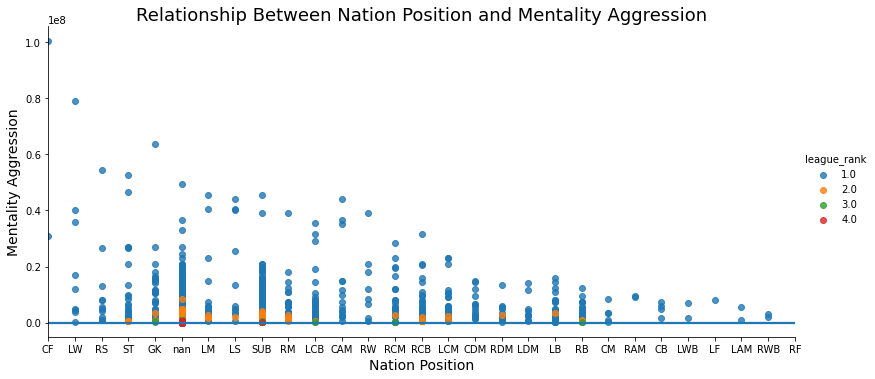

In [41]:
ax = sns.lmplot(x = "nation_position1",
               y = "value_eur",
               data = df, hue = "league_rank", fit_reg = False, height = 5, aspect = 2.2)
sns.regplot(x = "nation_position1",
               y = "mentality_aggression",
               data = df, scatter=False, ax=ax.axes[0, 0], order = 3)
plt.ylabel("Mentality Aggression")
plt.xticks(list(range(1,30)), list(df['nation_position'].unique()))
plt.title("Relationship Between Nation Position and Mentality Aggression", fontsize=18)
plt.xlabel("Nation Position", fontsize=14)
plt.ylabel("Mentality Aggression", fontsize=14)
plt.show()

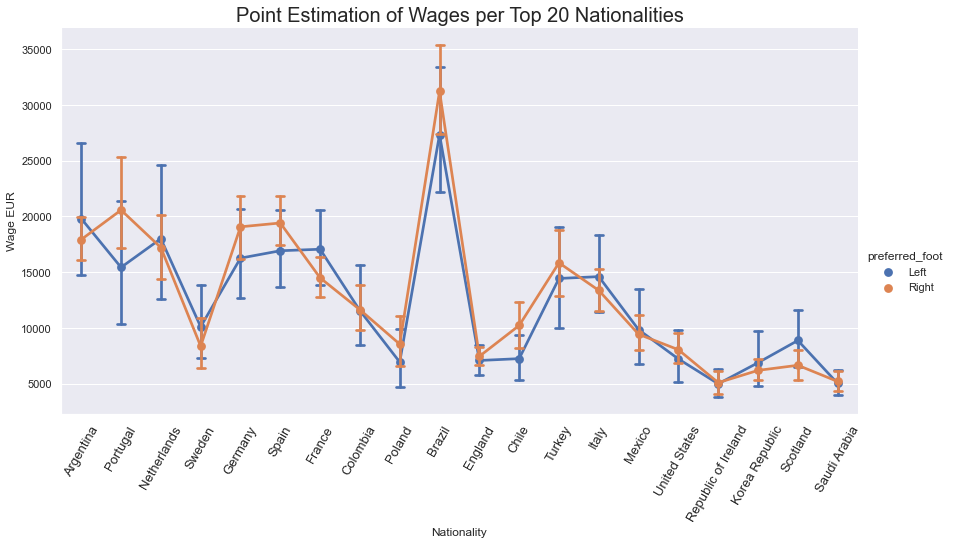

In [104]:
ax = sns.catplot(x = 'nationality', y = 'wage_eur', data = df_nationality,
                hue = 'preferred_foot', height=6, aspect=2,
                capsize=0.2, kind='point')
plt.xlabel("Nationality", fontsize=12)
plt.ylabel("Wage EUR", fontsize=12)
plt.title("Point Estimation of Wages per Top 20 Nationalities", fontsize=20)
plt.xticks(rotation = 60, fontsize=13)
plt.show()

In [50]:
df_nationality["nationality"].unique()

array(['Argentina', 'Portugal', 'Netherlands', 'Sweden', 'Germany',
       'Spain', 'France', 'Colombia', 'Poland', 'Brazil', 'England',
       'Chile', 'Turkey', 'Italy', 'Mexico', 'United States',
       'Republic of Ireland', 'Korea Republic', 'Scotland',
       'Saudi Arabia'], dtype=object)

In [62]:
df.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2       9014  https://sofifa.com/player/9014/arjen-robben/15...   
3      41236  https://sofifa.com/player/41236/zlatan-ibrahim...   
4     167495  https://sofifa.com/player/167495/manuel-neuer/...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   27  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   29  1985-02-05   
2          A. Robben                         Arjen Robben   30  1984-01-23   
3     Z. Ibrahimović                   Zlatan Ibrahimović   32  1981-10-03   
4           M. Neuer                         Manuel Neuer   28  1986-03-27   

   height_cm  weight_kg  nationality            club_name  \
0        169         67    Argentina         FC Barcelona   
1        185         80     Portugal          Real Madrid   
2        180         80  Netherlands    FC Bayern München   
3        195         95       Sweden  Paris Saint-Germain   
4        193         92      Germany    FC Bayern München   

              league_name  league_rank  overall  potential  value_eur  \
0  Spain Primera Division          1.0       93         95  100500000   
1  Spain Primera Division          1.0       92         92   79000000   
2    German 1. Bundesliga          1.0       90         90   54500000   
3          French Ligue 1          1.0       90         90   52500000   
4    German 1. Bundesliga          1.0       90         90   63500000   

   wage_eur player_positions preferred_foot  international_reputation  \
0    550000               CF           Left                         5   
1    375000           LW, LM          Right                         5   
2    275000       RM, LM, RW           Left                         5   
3    275000               ST          Right                         5   
4    300000               GK          Right                         5   

   weak_foot  skill_moves      work_rate body_type real_face  \
0          3            4     Medium/Low    Normal       Yes   
1          4            5       High/Low    Normal       Yes   
2          2            4       High/Low    Normal       Yes   
3          4            4     Medium/Low    Normal       Yes   
4          4            1  Medium/Medium    Normal       Yes   

   release_clause_eur                                        player_tags  \
0                 NaN  #Speedster, #Dribbler, #FK Specialist, #Acroba...   
1                 NaN  #Speedster, #Dribbler, #Distance Shooter, #Acr...   
2                 NaN  #Speedster, #Dribbler, #Distance Shooter, #Acr...   
3                 NaN  #Poacher, #Aerial Threat, #Distance Shooter, #...   
4                 NaN                                                NaN   

  team_position  team_jersey_number loaned_from      joined  \
0            CF                10.0         NaN  2004-07-01   
1            LW                 7.0         NaN  2009-07-01   
2           SUB                10.0         NaN  2009-08-28   
3            ST                10.0         NaN  2012-07-01   
4            GK                 1.0         NaN  2011-07-01   

   contract_valid_until nation_position  nation_jersey_number  pace  shooting  \
0                2018.0              CF                  10.0  93.0      89.0   
1                2018.0              LW                   7.0  93.0      93.0   
2                2017.0              RS                  11.0  93.0      86.0   
3                2016.0              ST                  10.0  76.0      91.0   
4                2019.0              GK                   1.0   NaN       NaN   

   passing  dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
0     86.0       96.0       27.0    63.0        NaN          NaN         NaN   
1     81.0       9

In [64]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name', 'league_name',
       'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur',
       'player_positions', 'preferred_foot', 'international_reputation',
       'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'team_position',
       'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until',
       'nation_position', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 

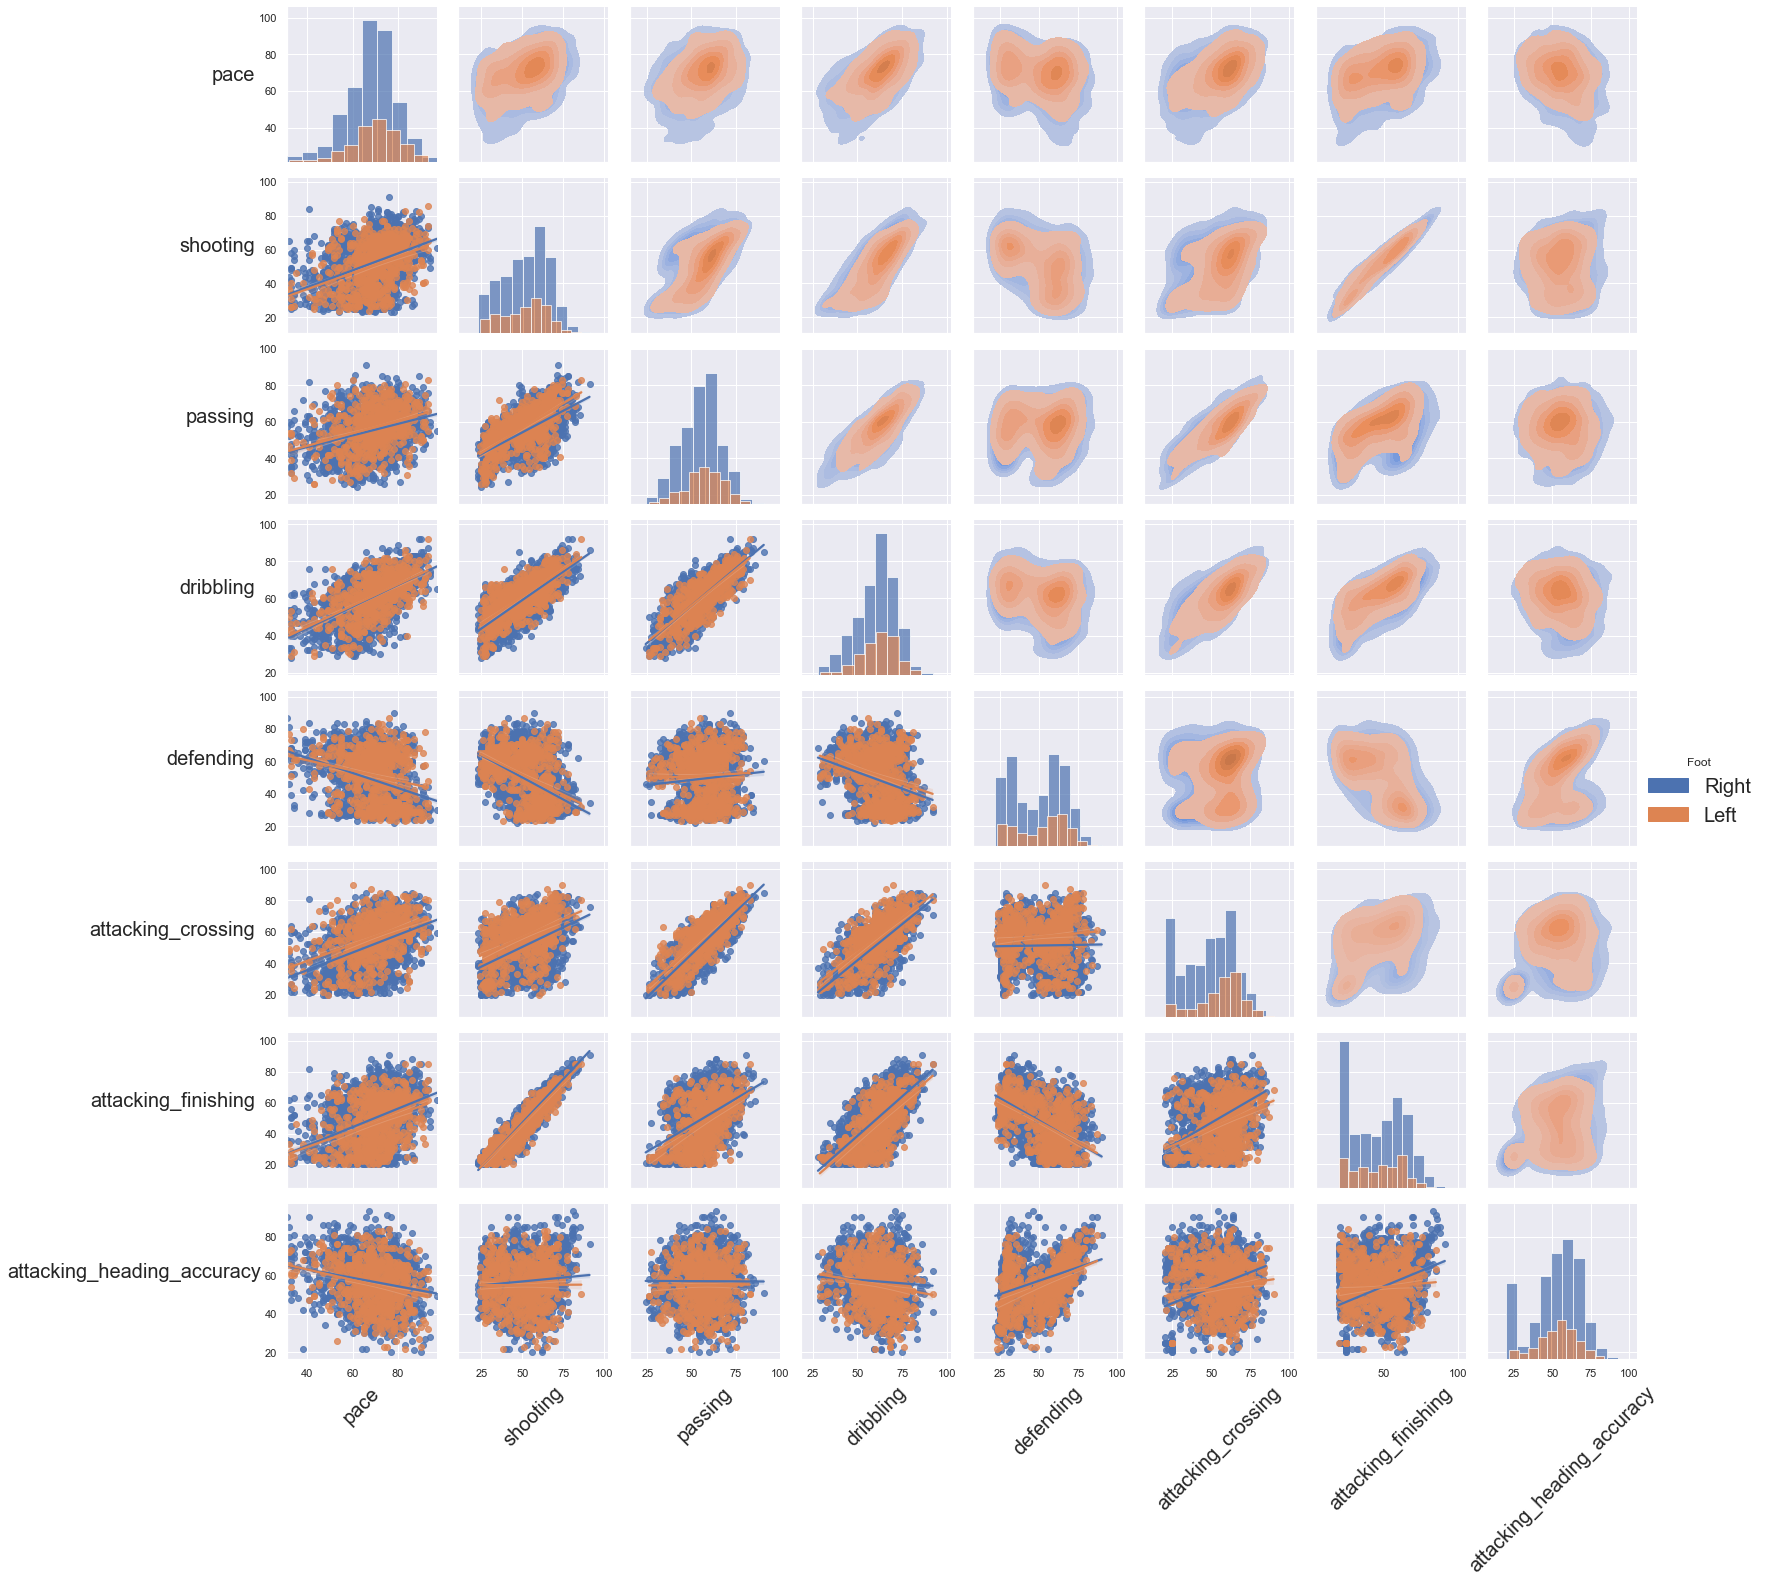

In [74]:
sns.set(color_codes=True)
plt.rcParams["axes.labelsize"] = 20
g1 = sns.PairGrid(df.sample(frac = 0.2), vars = ['pace', 'shooting',
       'passing', 'dribbling', 'defending', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy'],
              hue = 'preferred_foot')
g1.map_lower(sns.regplot)
g1.map_diag(plt.hist, alpha=0.7)
g1.map_upper(sns.kdeplot, shade=True)
g1.add_legend(title='Foot', fontsize=20)
for axes in g1.axes.flat:
    axes.set_ylabel(axes.get_ylabel(), rotation=0, horizontalalignment='right')
          
    axes.set_xlabel(axes.get_xlabel(), rotation=45)

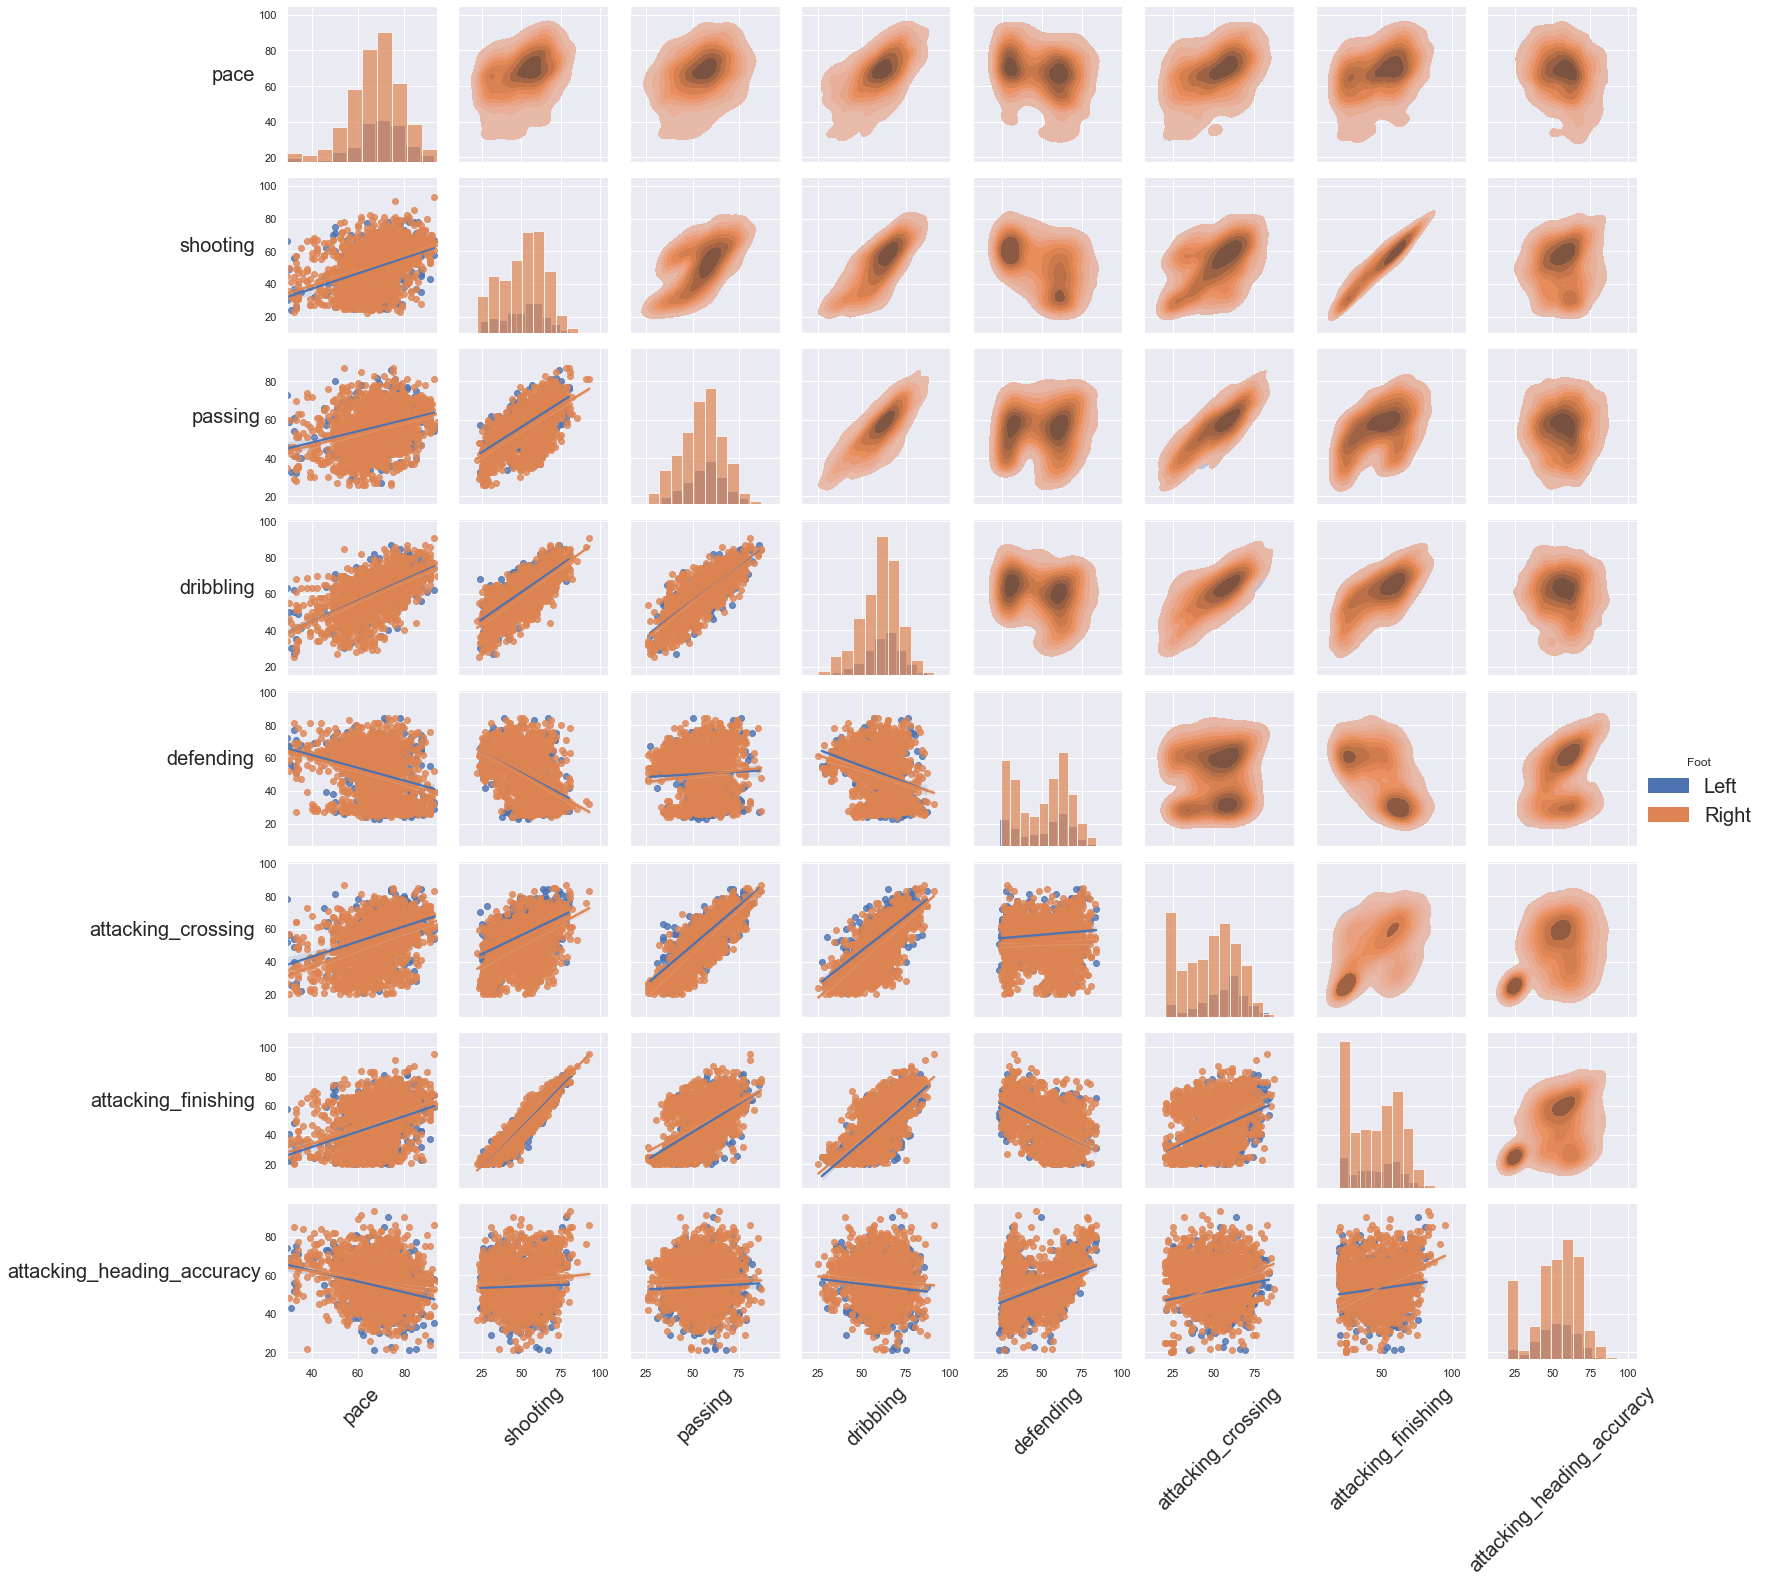

In [73]:
sns.set(color_codes=True)
plt.rcParams["axes.labelsize"] = 20
g1 = sns.PairGrid(df_nationality.sample(frac = 0.2), vars = ['pace', 'shooting',
       'passing', 'dribbling', 'defending', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy'],
              hue = 'preferred_foot')
g1.map_lower(sns.regplot)
g1.map_diag(plt.hist, alpha=0.7)
g1.map_upper(sns.kdeplot, shade=True)
g1.add_legend(title='Foot', fontsize=20)
for axes in g1.axes.flat:
    axes.set_ylabel(axes.get_ylabel(), rotation=0, horizontalalignment='right')
          
    axes.set_xlabel(axes.get_xlabel(), rotation=45)

In [57]:
df2 = df[['attacking_heading_accuracy', 'defending', 'body_type', 'mentality_aggression']]

In [58]:
df_encircle=df2[(df2['attacking_heading_accuracy'] >=50) & (df2['attacking_heading_accuracy'] <=70)].dropna()
df_encircle

attacking_heading_accuracy  defending body_type  mentality_aggression
2                              50       32.0    Normal                    47
6                              54       59.0    Normal                    58
7                              57       32.0    Normal                    54
14                             64       87.0    Normal                    58
17                             58       33.0    Normal                    51
...                           ...        ...       ...                   ...
16070                          50       28.0    Normal                    33
16098                          55       45.0    Normal                    25
16103                          50       46.0    Normal                    49
16143                          50       28.0    Normal                    29
16152                          57       52.0    Normal                    44

[8798 rows x 4 columns]

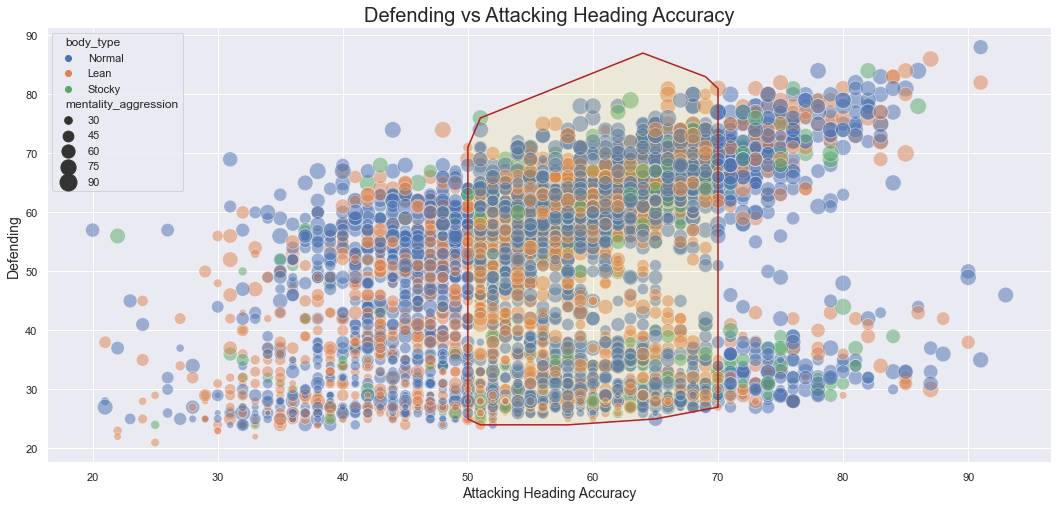

In [76]:
from scipy.spatial import ConvexHull

plt.figure(figsize=(18, 8))
ax = sns.scatterplot(x = "attacking_heading_accuracy", y = "defending", 
                 hue = "body_type",
                     alpha = 0.5, size = "mentality_aggression", sizes = (20, 300),
                 data = df.sample(frac=0.30))

def encircle(x, y, ax=None, **kw):
    if not ax:
        ax=plt.gca()
        p=np.c_[x, y]
        hull = ConvexHull(p)
        poly=plt.Polygon(p[hull.vertices, :], **kw)
        ax.add_patch(poly)
        
encircle(df_encircle.attacking_heading_accuracy, df_encircle.defending,
        ec = "k", fc="gold",
        alpha = 0.1)

encircle(df_encircle.attacking_heading_accuracy, df_encircle.defending,
        ec = "firebrick", fc="None",
        linewidth = 1.5)

plt.xlabel("Attacking Heading Accuracy", fontsize=14)
plt.ylabel("Defending", fontsize=14)
plt.title("Defending vs Attacking Heading Accuracy", fontsize=20)
plt.show()

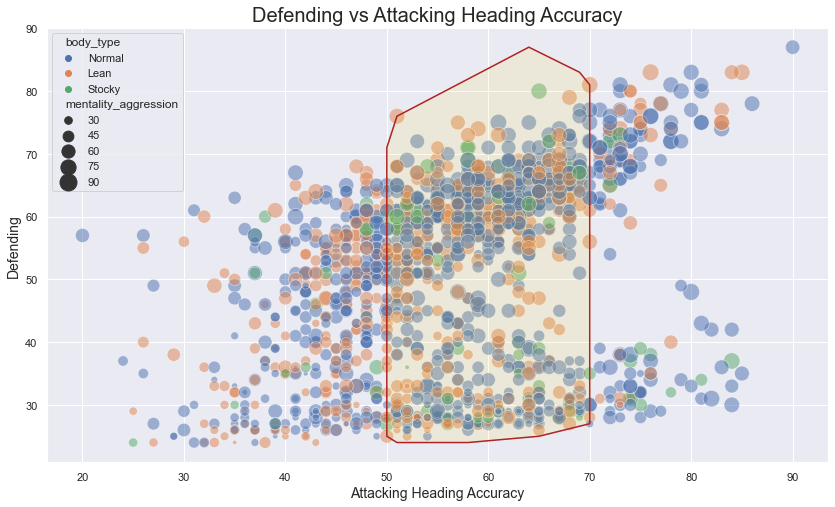

In [80]:
plt.figure(figsize=(14, 8))
ax = sns.scatterplot(x = "attacking_heading_accuracy", y = "defending", 
                 hue = "body_type",
                     alpha = 0.5, size = "mentality_aggression", sizes = (20, 300),
                 data = df.sample(frac=0.1))

def encircle(x, y, ax=None, **kw):
    if not ax:
        ax=plt.gca()
        p=np.c_[x, y]
        hull = ConvexHull(p)
        poly=plt.Polygon(p[hull.vertices, :], **kw)
        ax.add_patch(poly)
        
encircle(df_encircle.attacking_heading_accuracy, df_encircle.defending,
        ec = "k", fc="gold",
        alpha = 0.1)

encircle(df_encircle.attacking_heading_accuracy, df_encircle.defending,
        ec = "firebrick", fc="None",
        linewidth = 1.5)

plt.xlabel("Attacking Heading Accuracy", fontsize=14)
plt.ylabel("Defending", fontsize=14)
plt.title("Defending vs Attacking Heading Accuracy", fontsize=20)
plt.show()

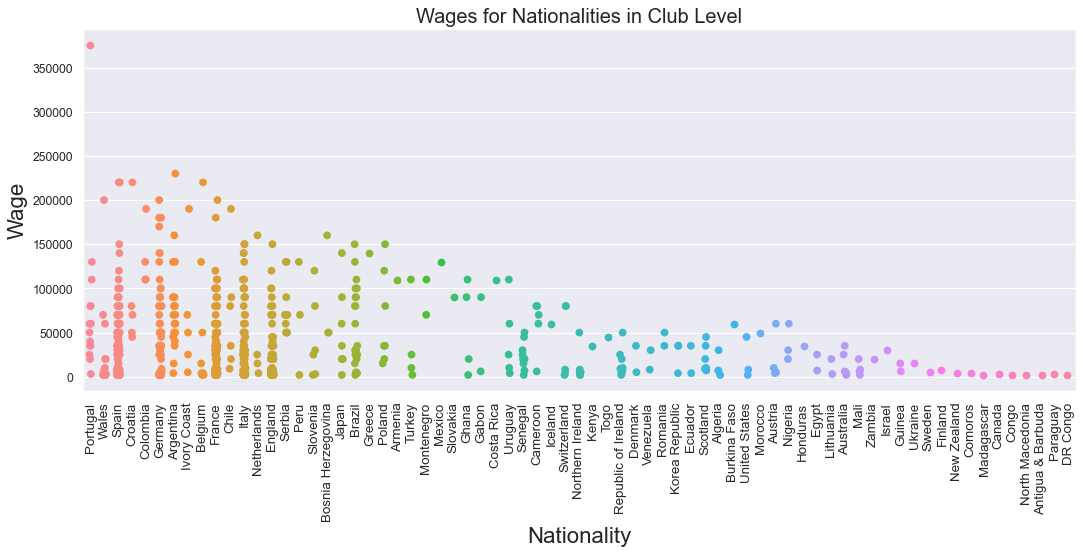

In [83]:
fig, ax = plt.subplots(figsize=(16, 6), dpi=80)
sns.stripplot(x = "nationality", y = "wage_eur",
              data=df_clubs, size = 7, ax=ax)
plt.tick_params(axis='x', which='major', labelsize=12, rotation=90)
plt.xlabel("Nationality")
plt.ylabel("Wage")
plt.title("Wages for Nationalities in Club Level", fontsize=18)
plt.show()

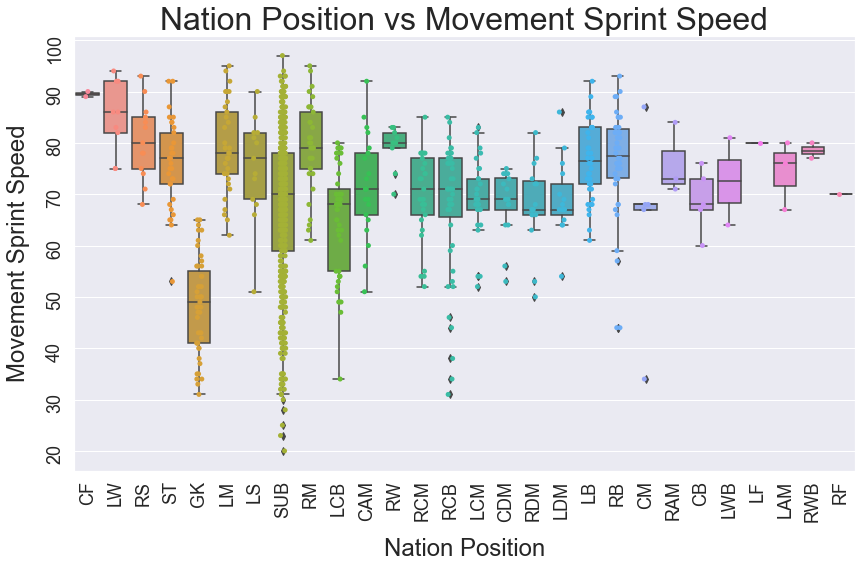

In [84]:
fig, ax = plt.subplots(figsize=(14, 8))

ax = sns.boxplot(x = 'nation_position', y = "movement_sprint_speed",
                data = df)
ax.tick_params(rotation=90, labelsize=18)
ax = sns.stripplot(x = 'nation_position', y = "movement_sprint_speed", data=df)
plt.xlabel("Nation Position", labelpad = 16, fontsize=24)
plt.ylabel("Movement Sprint Speed", labelpad = 16, fontsize=24)
plt.title("Nation Position vs Movement Sprint Speed", fontsize=32)
plt.show()

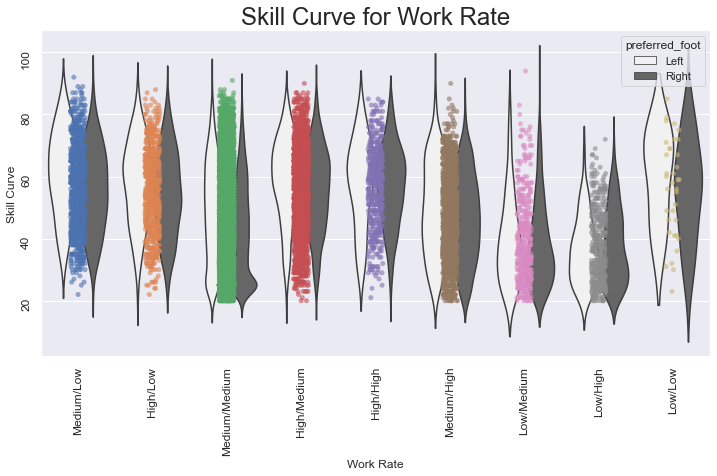

In [85]:
fig, ax = plt.subplots(figsize=(12, 6))
ax=sns.violinplot(x = "work_rate", y = "skill_curve", hue="preferred_foot",
                 data=df, inner=None, color = "0.4")
ax = sns.stripplot(x = "work_rate", y = "skill_curve", alpha = 0.6, data=df)
ax.tick_params(rotation=90, labelsize=12)
plt.xlabel("Work Rate", fontsize = 12)
plt.ylabel("Skill Curve", fontsize = 12)
plt.title("Skill Curve for Work Rate", fontsize=24)
plt.show()

In [100]:
d = df.groupby('nationality')['power_stamina'].agg([np.median])
d.head()

median
nationality              
Albania              68.0
Algeria              71.0
Angola               64.0
Antigua & Barbuda    68.5
Argentina            67.0

In [101]:
d1 = d[:20].reset_index()
d1.rename(columns={"median": 'power_stamina'})

nationality  power_stamina
0              Albania           68.0
1              Algeria           71.0
2               Angola           64.0
3    Antigua & Barbuda           68.5
4            Argentina           67.0
5              Armenia           67.5
6            Australia           66.0
7              Austria           65.0
8           Azerbaijan           72.0
9              Bahrain           67.0
10            Barbados           69.0
11             Belarus           63.5
12             Belgium           66.0
13               Benin           69.5
14             Bermuda           55.5
15             Bolivia           63.0
16  Bosnia Herzegovina           66.0
17              Brazil           68.0
18            Bulgaria           68.0
19        Burkina Faso           72.5

In [102]:
d1 = d1.rename(columns={"median": 'power_stamina'})
d1.head()

nationality  power_stamina
0            Albania           68.0
1            Algeria           71.0
2             Angola           64.0
3  Antigua & Barbuda           68.5
4          Argentina           67.0

<ipython-input-103-1fcce7022696>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(d1.nationality, rotation=90)


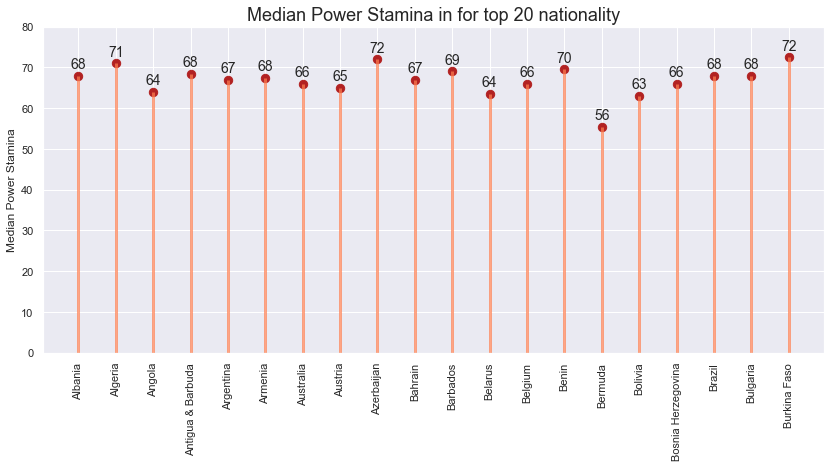

In [103]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.vlines(x=d1['nationality'], ymin=0, ymax = d1.power_stamina,
        color = 'coral', alpha = 0.7, linewidth = 3)
ax.scatter(x = d1["nationality"], y = d1["power_stamina"],
          s = 70, color = "firebrick")

ax.set_ylabel("Median Power Stamina", fontsize = 12)
ax.set_xticklabels(d1.nationality, rotation=90)
ax.set_ylim(0, 80)
ax.set_title("Median Power Stamina in for top 20 nationality", fontsize=18)


for row in d1.itertuples():
    ax.text(row.Index, row.power_stamina+1, s = round(row.power_stamina),
           horizontalalignment = 'center', verticalalignment='bottom', fontsize=14)
plt.show()